Breast Cancer Wisconsin (Diagnostic) Data Set

! pip install keras

In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output


In [3]:
# Read the data file

data = pd.read_excel('minibatch.xlsx')
data.head()


,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,minibatch
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


In [4]:
# Cleaning and modifying the data
data = data.drop('Unnamed: 0',axis=1)
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:23]))
datas.columns = list(data.iloc[:,1:23].columns)
datas['minibatch'] = data['minibatch']
# Creating the high dimensional feature space X
data_drop = datas.drop('minibatch',axis=1)
X = data_drop.values



## Bulding CNN

### keras + Conv2D + MaxPooling2D

In [10]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.optimizers import SGD

#BULDING CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compiler and optmaization

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])


In [12]:
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dense_1 (Dense)             (None, 4, 4, 2)          

In [13]:
import visualkeras

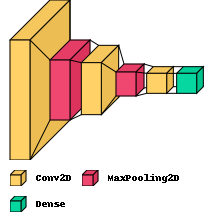

In [14]:
visualkeras.layered_view(model, legend=True)